In [79]:
# For data manipulation and analysis
import pandas as pd  

# For statistical data visualization
import seaborn as sns 

# For creating plots and visualizations
import matplotlib.pyplot as plt  

# For numerical computing and array manipulation
import numpy as np  

# Importing specific functions from scipy.stats module
# For statistical functions such as correlation calculation and normality test
from scipy.stats import spearmanr, shapiro, pearsonr  


In [ ]:
# Setting the style for our plots
sns.set_style("whitegrid")
colors = ["#dabfff", "#907ad6", "#4f518c"] 

Violin Plot

In [81]:
def violinPlot(x,y,data):
    
    sns.violinplot(x=x, y=y, data=data,palette=colors)
    plt.xlabel('News Sentiments', fontsize=12)
    plt.ylabel('Change percentages of the stock price (%)', fontsize=12)
    plt.title('Impact of News Sentiments on Stock Price Changes', fontsize=14)

    plt.show()

Bar Plots

In [82]:
def frequencySentiments(x,data):
    sentiment_counts = data[x].value_counts()
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,palette=colors,edgecolor='black')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Sentiment Frequency')
    plt.show()

In [83]:
def frequencyLabels(x,data):
    labels_count= data[x].value_counts()
    sns.barplot(x=labels_count.index, y=labels_count.values,palette=colors,edgecolor='black')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.title('Label Frequency')
    plt.show()

Scatter Plot

In [84]:
def scatterPlot(x,y,data):
    sns.regplot(x=x, y=y, data=data, scatter=True, color='#dabfff', line_kws={'color':'#4f518c'}, ci=None)
    plt.xlabel('Compound Sentiment Score')
    plt.ylabel('Change in Stock Price (%)')
    plt.title('Sentiment Scores vs. Stock Price Changes')
    plt.show()

Tests

In [85]:

def spearman_test(dataframe, var1, var2):
    """
    Perform Spearman Rank Correlation Test between two variables in a dataframe.
    """
    spearman_corr, spearman_p_value = spearmanr(dataframe[var1], dataframe[var2])
    return spearman_corr, spearman_p_value

In [86]:
def shapiro_test(data):
    """
    Perform Shapiro-Wilk Test for normality.
    """
    shapiro_stat, shapiro_p_value = shapiro(data)
    return shapiro_stat, shapiro_p_value

In [87]:
def pearson_test(dataframe, var1, var2):
    """
    Perform Pearson Correlation Test between two variables in a dataframe.
    """
    pearson_corr, pearson_p_value = pearsonr(dataframe[var1], dataframe[var2])
    return pearson_corr, pearson_p_value

In [88]:
df=pd.read_csv(r'..\data\NewsWithStockPrices.csv')

# <font color='pink'>After 30 mins</font>

In [89]:
after_30=pd.read_csv(r'..\data\stockPrices\stock_prices_after_30_mins.csv')
after_30.head(1)

,Date,article_title,article,source_name,source_link,ticker_symbol,Positive,Negative,Neutral,Compound,Sentiment,stock_price,stock_price_after_30_mins,change_percentage,label
0,2024-05-06 19:20:00,25 Richest Billionaires in Manufacturing Industry,"In this article, we discuss the 25 richest bil...",Yahoo Finance,https://finance.yahoo.com/news/25-richest-bill...,AAPL,0.12,0.004,0.876,0.9996,Positive,181.100006,181.399994,0.165648,1


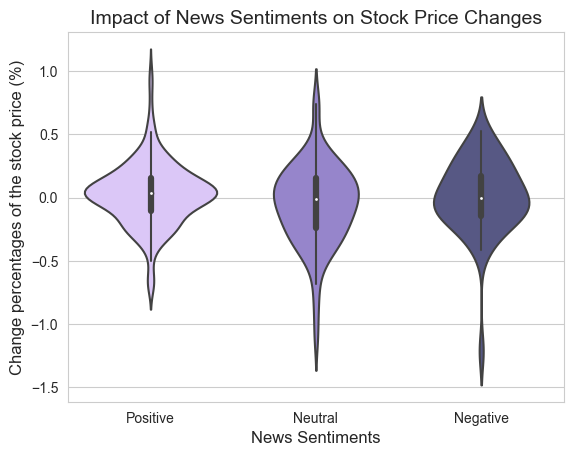

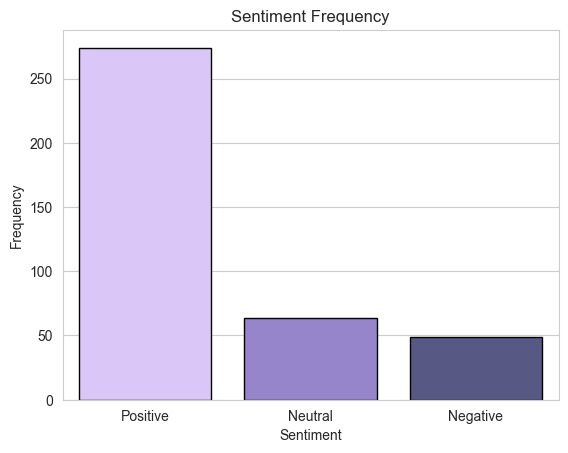

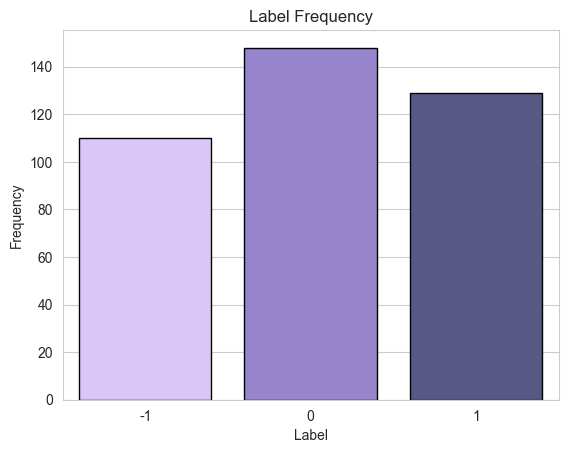

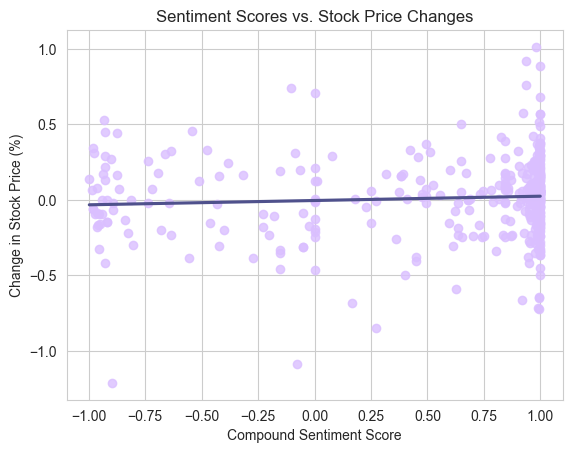

In [90]:
violinPlot('Sentiment','change_percentage',after_30)
frequencySentiments('Sentiment',after_30)
frequencyLabels('label',after_30)
scatterPlot('Compound','change_percentage',after_30)

In [91]:
compound_scores = after_30['Compound']
change_percentage = after_30['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_30, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_30, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: 0.09087599122006784
p-value: 0.07415519722102633
Shapiro-Wilk test statistic for Compound scores: 0.692694902420044
p-value for Compound scores: 5.720116089121483e-26
Shapiro-Wilk test statistic for Change percentage: 0.9651305675506592
p-value for Change percentage: 5.6915364865517404e-08
Pearson correlation coefficient: 0.06909460038113151
p-value: 0.17494793050589913


# <font color='pink'>After 6 hours</font>

In [92]:
after_6_hours=pd.read_csv('..\data\stockPrices\stock_prices_after_6_hours.csv')

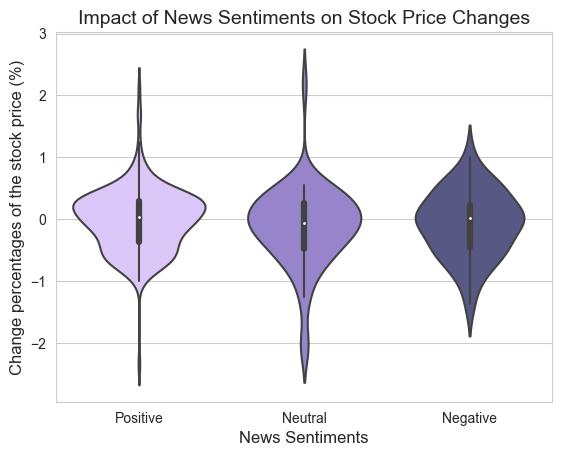

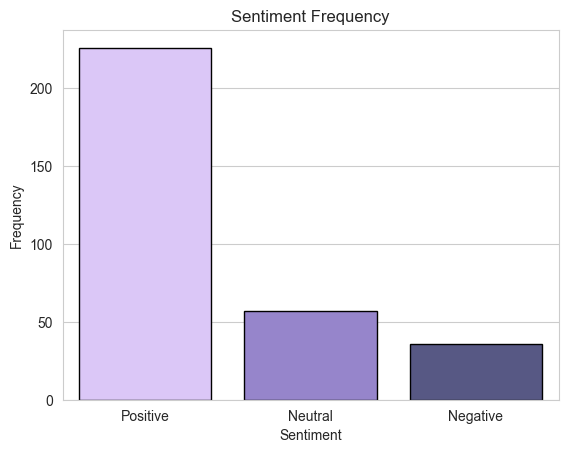

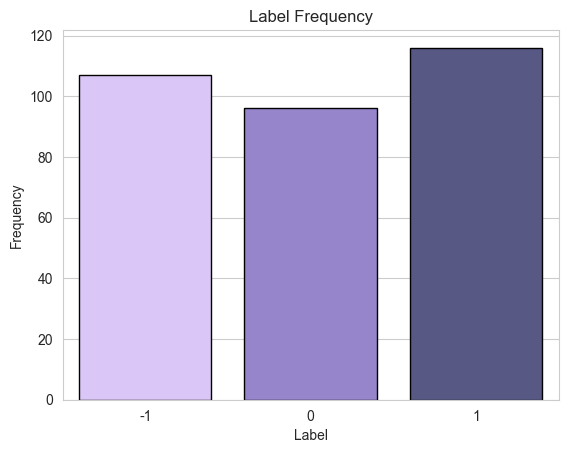

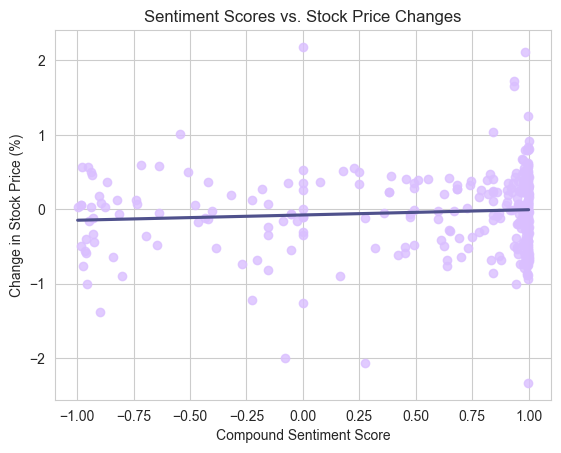

In [93]:
violinPlot('Sentiment','change_percentage',after_6_hours)
frequencySentiments('Sentiment',after_6_hours)
frequencyLabels('label',after_6_hours)
scatterPlot('Compound','change_percentage',after_6_hours)

In [94]:
compound_scores = after_6_hours['Compound']
change_percentage = after_6_hours['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_6_hours, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_6_hours, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: 0.05573359479240012
p-value: 0.3210523467387798
Shapiro-Wilk test statistic for Compound scores: 0.698782742023468
p-value for Compound scores: 1.6079029975870553e-23
Shapiro-Wilk test statistic for Change percentage: 0.9525768160820007
p-value for Change percentage: 1.249010228576708e-08
Pearson correlation coefficient: 0.0836042739820894
p-value: 0.1362326671908783


# <font color ='pink'> After a Day</font>

In [95]:
after_1_day=pd.read_csv('..\data\stockPrices\stock_prices_after_1_day.csv')

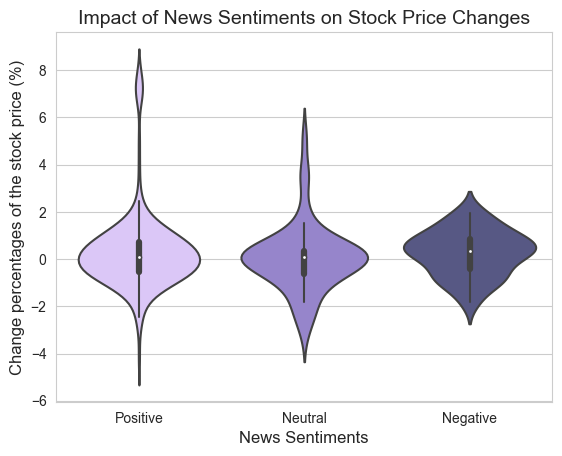

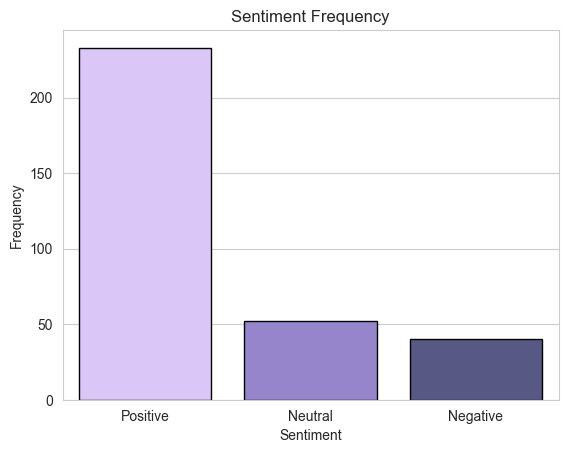

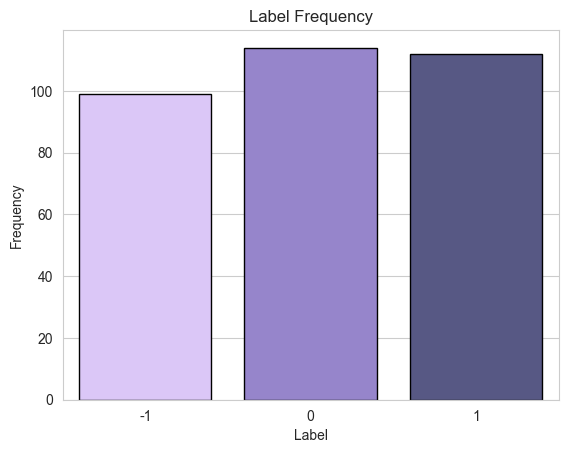

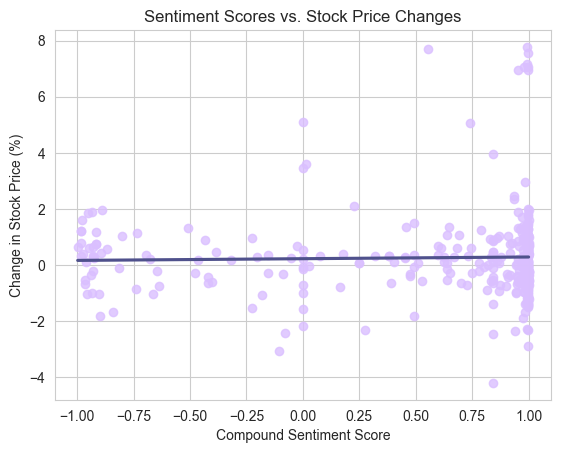

In [96]:
violinPlot('Sentiment','change_percentage',after_1_day)
frequencySentiments('Sentiment',after_1_day)
frequencyLabels('label',after_1_day)
scatterPlot('Compound','change_percentage',after_1_day)

In [97]:
compound_scores = after_1_day['Compound']
change_percentage = after_1_day['change_percentage']


spearman_corr, spearman_p_value = spearman_test(after_1_day, 'Compound', 'change_percentage')
shapiro_stat_compound, shapiro_p_value_compound = shapiro_test(compound_scores)
shapiro_stat_change, shapiro_p_value_change = shapiro_test(change_percentage)
pearson_corr, pearson_p_value = pearson_test(after_1_day, 'Compound', 'change_percentage')


print("Spearman correlation coefficient:", spearman_corr)
print("p-value:", spearman_p_value)
print("Shapiro-Wilk test statistic for Compound scores:", shapiro_stat_compound)
print("p-value for Compound scores:", shapiro_p_value_compound)
print("Shapiro-Wilk test statistic for Change percentage:", shapiro_stat_change)
print("p-value for Change percentage:", shapiro_p_value_change)
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)

Spearman correlation coefficient: -0.04014010455865524
p-value: 0.47082426748105666
Shapiro-Wilk test statistic for Compound scores: 0.6880525350570679
p-value for Compound scores: 4.317251140822776e-24
Shapiro-Wilk test statistic for Change percentage: 0.7926808595657349
p-value for Change percentage: 4.801277777097417e-20
Pearson correlation coefficient: 0.02514098023801927
p-value: 0.6515855986168684
